In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Solapando una imagen BGRA con una BGR

Lectura de las imagenes, el uso de `cv2.IMREAD_UNCHANGED` es necesario para incluir el canal `alpha`, notece que al no utilizarlo solo se obtienen 3 canales (BGR)

The shape of image is:  (648, 1038, 3)
The shape of label (without flag) is:  (201, 322, 3)
The shape of label (with flag) is:  (648, 1038, 4)


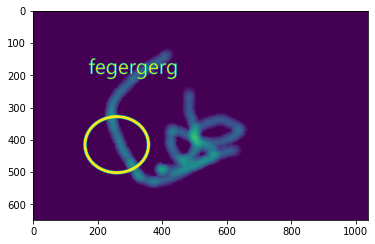

In [31]:
image = cv2.imread('image.jpg', cv2.IMREAD_UNCHANGED)
print('The shape of image is: ',image.shape)

label = cv2.imread('image_rgba.png')
print('The shape of label (without flag) is: ',label.shape)
label = cv2.imread('image_rgba2.png',cv2.IMREAD_UNCHANGED)
print('The shape of label (with flag) is: ',label.shape)
plt.imshow(label[:,:,3])

Usando `np.where()` podemos filtrar los pixeles que tienen `255` en el canal alpha

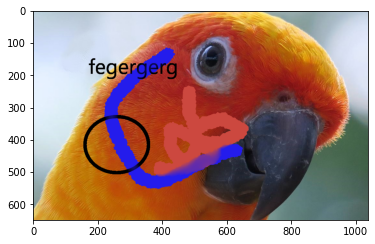

In [32]:
result=image.copy()
result=np.where(label[:,:,3:],label[:,:,:3],image)
plt.imshow(result)

#### Imágenes de distinto tamaño

In [33]:
label2 = cv2.imread('image_rgba.png',cv2.IMREAD_UNCHANGED)
print('The shape of label2 (with flag) is: ',label2.shape)

The shape of label2 (with flag) is:  (201, 322, 4)


Se hace necesario agregar un margen adicional a partir de una ubicación (top,left)

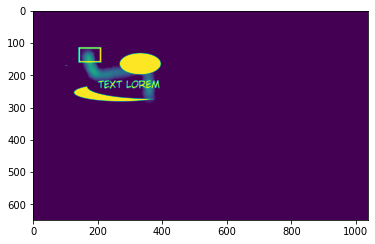

In [34]:
top=100; left=100
# Un error que me tomó tiempo es el `.astype(int)`
temp=np.zeros((*image.shape[:2],4),np.uint8)
# rgba = cv2.cvtColor(image, cv2.COLOR_RGB2RGBA)
temp[top:top+label2.shape[0],left:left+label2.shape[1],:]=label2
plt.imshow(temp[:,:,3])

Al intentar hacer lo mismo que antes, resulta que no hay `alpha` intermedio entre `0` y `255`, por lo que se pierde la opacidad.

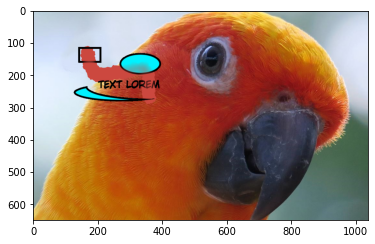

In [35]:
result1=image.copy()
result1=np.where(temp[:,:,3:],temp[:,:,:3],image)
# result=np.where(temp[:,:,3:],image,temp[:,:,:3])
plt.imshow(result1)
# plt.imshow(temp[:,:,3])


##### Una alternativa fallida
`cv2.addWeighted()` funciona para unir dos imágenes de mismo tamaño con parámetros de peso constantes (alpha,beta)

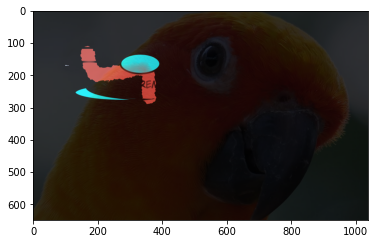

In [36]:
alpha=0.8
dst = cv2.addWeighted(temp[:,:,:3], alpha, image, 1-alpha, 0.0)
# dst = cv2.addWeighted(temp[:,:,:3], alpha, image, 1-alpha, 0.0,dtype=1)
plt.imshow(dst)

Resulta que atendiendo a la definición, se puede utilizar la suma ponderada de cada pixel de la siguiente forma:

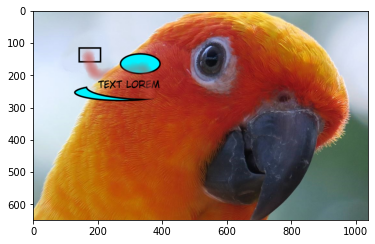

In [37]:
dst = np.array(np.multiply(temp[...,:3],temp[:,:,3:]/255)+np.multiply(image,1-temp[...,3:]/255),np.uint8)
plt.imshow(dst)

### Resultado
Implementando de forma general en una función quedaría como:

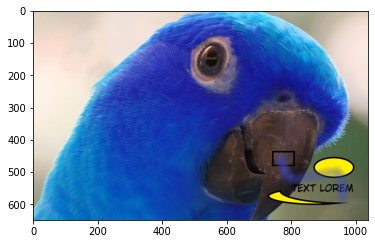

In [38]:
def addWeighted2(label2,image,top,left):
    temp=np.zeros((*image.shape[:2],4),np.uint8)
    temp[top:top+label2.shape[0],left:left+label2.shape[1],:]=label2
    dst = np.array(np.multiply(temp[...,:3],temp[:,:,3:]/255)+np.multiply(image,1-temp[...,3:]/255),np.uint8)
    return dst
dst=addWeighted2(label2,image,420,700)

dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGBA)
plt.imshow(dst)

### Recursos

* [overlay a smaller image on a larger image python OpenCv](https://stackoverflow.com/q/14063070/13636459)
* [OpenCV - Apply mask to a color image](https://stackoverflow.com/questions/10469235/opencv-apply-mask-to-a-color-image)
* [How can you read RGBA using opencv::cv2.IMREAD_UNCHANGED](https://stackoverflow.com/a/57736973/13636459)
* [How to load png images with 4 channels?::cv2.IMREAD_UNCHANGED](https://stackoverflow.com/a/29547458/13636459)